# K - Fold Cross Vaildation 
In K-Fold Cross Validation, we split the dataset into "K" number of folds (subsets). One chunk of data is used as test data for evaluation & the remaining part of the data is used for training the model. Each time, a different chunk will be used as the test data.

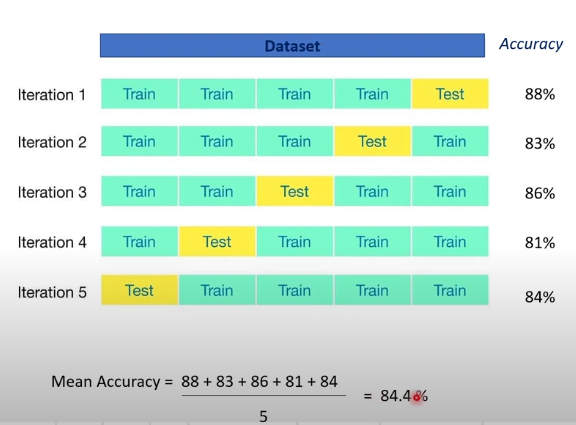

## Advantages of K-Fold Cross - Validation
1. Better alternative for train-test split when the dataset is small
2. Better for multiclass classification problems
3. More Reliable
4. Useful for Model Selection


In [1]:
 # importing the required library 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# loading the data 
data = pd.read_csv(r"C:\Users\utkar\100 days ML\Heart Disease Prediction\heart_disease_data.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# shape or no. of rows and columns 
data.shape

(303, 14)

In [5]:
# checking for missing value 
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# count the taget value
data['target'].value_counts() # 1 defective and 0 for non defective

target
1    165
0    138
Name: count, dtype: int64

In [7]:
# features and target for training the model 
x = data.drop(columns = 'target', axis = 1)
y = data['target']

In [8]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [9]:
print(y)


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# train test split

In [12]:
# train test splint 
X_train,X_test,Y_train,Y_test =train_test_split(x,y,test_size = 0.2,stratify = y,random_state =3)

In [13]:
# shape of fearture , train , test of feature 
print(x.shape , X_train.shape , X_test.shape)

(303, 13) (242, 13) (61, 13)


In [14]:
# comparing the performance of the model
models = [LogisticRegression(max_iter = 1000 ),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [15]:
# comparision the model 
def compare_models():
    for model in models:
        # traininig the model
        model.fit(X_train, Y_train)
        # evaluate the model
        test_data_prediction = model.predict(X_test)
        accuracy = accuracy_score(Y_test,test_data_prediction)
        print(" Accuracy score of the ",model ,'=', accuracy)

In [16]:
compare_models()

 Accuracy score of the  LogisticRegression(max_iter=1000) = 0.7704918032786885
 Accuracy score of the  SVC(kernel='linear') = 0.7704918032786885
 Accuracy score of the  KNeighborsClassifier() = 0.6557377049180327
 Accuracy score of the  RandomForestClassifier() = 0.7704918032786885


## Cross Validation
#### Logistic Regression

In [17]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter = 1000), x,y ,cv=5)
print(cv_score_lr)
mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr,2)
print(mean_accuracy_lr)

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
82.83


C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support Vector Machine

In [18]:
cv_score_svc = cross_val_score(SVC(max_iter = 1000), x,y ,cv=5)
print(cv_score_svc)
mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)
mean_accuracy_svc = mean_accuracy_svc*100
mean_accuracy_svc = round(mean_accuracy_svc,2)
print(mean_accuracy_svc)

[0.60655738 0.60655738 0.73770492 0.68333333 0.58333333]
64.35


### Random Forest 

In [19]:
cv_score_rf = cross_val_score(RandomForestClassifier(), x,y ,cv=5)
print(cv_score_rf)
mean_accuracy_rf = sum(cv_score_rf)/len(cv_score_rf)
mean_accuracy_rf = mean_accuracy_rf*100
mean_accuracy_rf = round(mean_accuracy_rf,2)
print(mean_accuracy_rf)

[0.83606557 0.8852459  0.83606557 0.78333333 0.75      ]
81.81


### KNN

In [20]:
cv_score_knn = cross_val_score(KNeighborsClassifier(), x,y ,cv=5)
print(cv_score_knn)
mean_accuracy_knn = sum(cv_score_knn)/len(cv_score_knn)
mean_accuracy_knn = mean_accuracy_knn*100
mean_accuracy_knn = round(mean_accuracy_knn,2)
print(mean_accuracy_knn)

[0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
64.39


####  Creating the model for finding the best model


In [21]:
# comparing the performance of the model
models = [LogisticRegression(max_iter = 1000 ),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [22]:
# comparision the model 
def compare_models_cross():
    for model in models:
        cv_score= cross_val_score(model, x,y, cv= 5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = round(mean_accuracy,2)
        print("The Cross-Validation accuracy for the model is :",cv_score )
        print("The accuracy % of the model" ,mean_accuracy)
        print("--------------------------------------------------------------------")

In [23]:
compare_models_cross()

C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Cross-Validation accuracy for the model is : [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
The accuracy % of the model 0.83
--------------------------------------------------------------------
The Cross-Validation accuracy for the model is : [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
The accuracy % of the model 0.83
--------------------------------------------------------------------
The Cross-Validation accuracy for the model is : [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
The accuracy % of the model 0.64
--------------------------------------------------------------------
The Cross-Validation accuracy for the model is : [0.83606557 0.86885246 0.80327869 0.76666667 0.8       ]
The accuracy % of the model 0.81
--------------------------------------------------------------------


# Hyperparameter Tuning

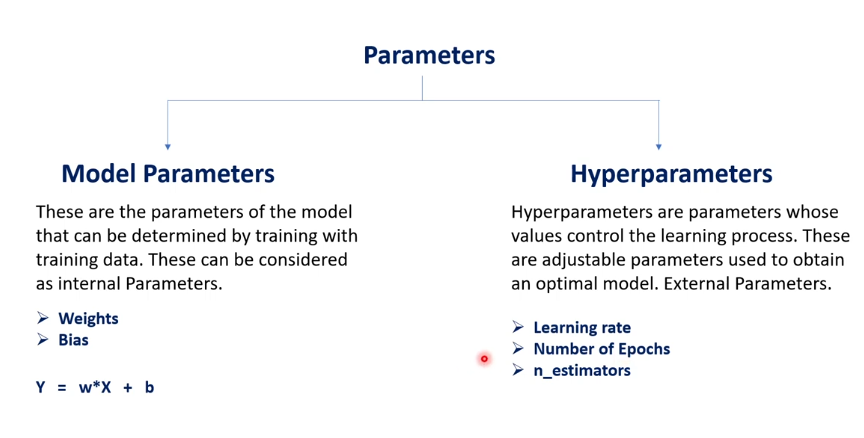

### n_estimators : 
It is nothing but number of decision tree in the random forest 

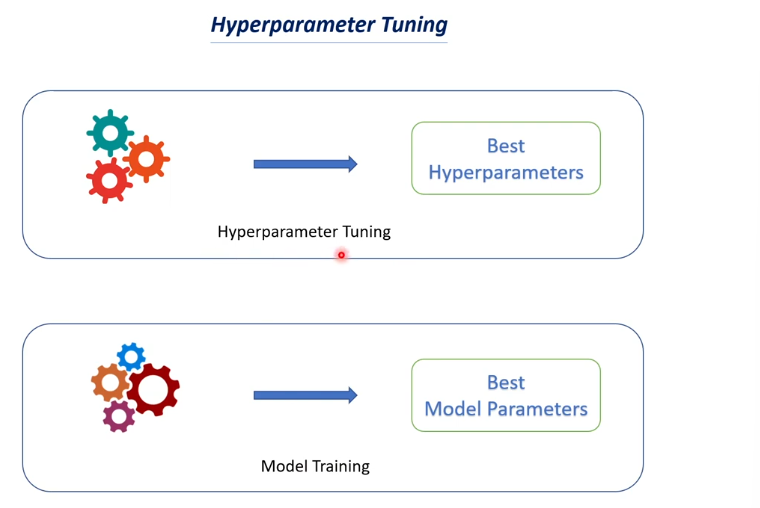

### Hpyerparameter Tunig refers to the process of choosing the optimum set of hyperparameter for a Machine Learning model.This process is also called Hyperparameter Optimization.

#### Hyperparameter Tuning is of two type
##### GridSearchCV 
It will use all the value and each time it will find the accuracy of all the values and check which is giving the highest accuracy. 
##### RandomizedSearchCV 
It will randomly select the few parameters and check which one is the best .

### Implementation of Hyperparameter Tuning (GridSearchCV) & (RamdomizedSeachCV)


In [27]:
# importing the library 
import numpy as np 
import pandas as pd 
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [28]:
# loading the dataset 
breast_dataset = sklearn.datasets.load_breast_cancer()

In [29]:
print(breast_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [33]:
data_frame = pd.DataFrame(breast_dataset.data,columns = breast_dataset.feature_names)

In [38]:
data_frame['label'] = breast_dataset.target

In [39]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [40]:
data_frame.shape

(569, 31)

In [41]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [43]:
# checking the distributon in target values 
data_frame['label'].value_counts()  # 1 represent bening and 0 represent Malignant

label
1    357
0    212
Name: count, dtype: int64

In [45]:
# distribuation of data 
x = data_frame.drop(columns = 'label', axis = 1)
y = data_frame['label']

In [47]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [48]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


In [49]:
x = np.asarray(x)
y = np.asarray(y)

### GridSearchCV is used for determining the best parameter for our model

In [50]:
# loding the support vector machine
model = SVC()

In [52]:
# Hyperparameter


parameters = {'kernel' :['linear','poly','rbf','sigmoid'],'C':[1,5,10,20] 
}

In [53]:
# grid search 
classifier = GridSearchCV(model, parameters , cv=5)

In [54]:
# fiting the data to the model gridsearchcv automatically transform the data into train and test. Due to cross validation 
classifier.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [56]:
classifier.cv_results_

{'mean_fit_time': array([8.73905039e-01, 2.62246132e-03, 7.36665726e-04, 8.07709694e-03,
        1.79456034e+00, 2.04153061e-03, 4.02941704e-03, 5.75413704e-03,
        2.66883984e+00, 2.21090317e-03, 3.22599411e-03, 7.52992630e-03,
        4.36126475e+00, 2.20761299e-03, 4.20436859e-03, 4.70795631e-03]),
 'std_fit_time': array([3.36349907e-01, 1.49317701e-03, 7.85311227e-04, 1.51247866e-03,
        3.55014848e-01, 2.49064041e-03, 1.18059744e-03, 1.15644600e-03,
        5.21556788e-01, 2.50079374e-03, 1.64668856e-03, 1.86916766e-03,
        1.43694707e+00, 2.26813006e-03, 1.35305863e-03, 9.89921228e-04]),
 'mean_score_time': array([0.0012084 , 0.00124683, 0.00364308, 0.00073395, 0.00020919,
        0.00050459, 0.00051947, 0.00173073, 0.00131817, 0.00100756,
        0.00093226, 0.00163159, 0.00041251, 0.00100622, 0.00023451,
        0.00283618]),
 'std_score_time': array([0.00147999, 0.00182421, 0.00184766, 0.00092116, 0.00041838,
        0.00100918, 0.00103893, 0.00161641, 0.00214925, 

In [59]:
# print the best parameter for svm 
best = classifier.best_params_
print(best)

{'C': 10, 'kernel': 'linear'}


In [62]:
#  for highest accuracy for the particular frame 
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [63]:
# loding the result to pandas dataframe 
result = pd.DataFrame(classifier.cv_results_)

In [64]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.873905,0.336350,0.001208,0.001480,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.002622,0.001493,0.001247,0.001824,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.000737,0.000785,0.003643,0.001848,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.008077,0.001512,0.000734,0.000921,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,1.794560,0.355015,0.000209,0.000418,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [65]:
grid_search_result = result[['param_C','param_kernel','mean_test_score']]

In [66]:
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


### RandonizedSearchCV

In [67]:
 # loding the support vector machine
model = SVC()

In [68]:
# Hyperparameter


parameters = {'kernel' :['linear','poly','rbf','sigmoid'],'C':[1,5,10,20] 
}

In [69]:
# grid search 
classifier = RandomizedSearchCV(model, parameters , cv=5)

In [70]:
# fiting the data to the model gridsearchcv automatically transform the data into train and test. Due to cross validation 
classifier.fit(x,y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [71]:
classifier.cv_results_

{'mean_fit_time': array([4.34782166e+00, 2.64470596e+00, 2.32052803e-03, 2.66261101e-03,
        1.83964572e+00, 6.55541420e-03, 8.71930838e-01, 8.10589790e-03,
        2.94618607e-03, 3.75304222e-03]),
 'std_fit_time': array([1.41769682e+00, 4.97973742e-01, 4.01815624e-04, 1.38719387e-03,
        3.69392832e-01, 2.00213487e-03, 3.36363995e-01, 2.45185568e-03,
        2.10801813e-03, 1.47849729e-03]),
 'mean_score_time': array([0.00033989, 0.00133247, 0.00080857, 0.00075431, 0.00193048,
        0.00144138, 0.00141549, 0.0012763 , 0.00249147, 0.00176849]),
 'std_score_time': array([0.00046661, 0.00169645, 0.00040447, 0.00078793, 0.00162233,
        0.00216467, 0.00136874, 0.00131523, 0.00203125, 0.00093359]),
 'param_kernel': masked_array(data=['linear', 'linear', 'poly', 'poly', 'linear',
                    'sigmoid', 'linear', 'sigmoid', 'rbf', 'rbf'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?'

In [72]:
# print the best parameter for svm 
best = classifier.best_params_
print(best)

{'kernel': 'linear', 'C': 10}


In [73]:
#  for highest accuracy for the particular frame 
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [74]:
# loding the result to pandas dataframe 
result = pd.DataFrame(classifier.cv_results_)

In [75]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.347822,1.417697,0.000340,0.000467,linear,20,"{'kernel': 'linear', 'C': 20}",0.929825,0.956140,0.956140,0.938596,0.964602,0.949061,0.012816,3
1,2.644706,0.497974,0.001332,0.001696,linear,10,"{'kernel': 'linear', 'C': 10}",0.938596,0.938596,0.973684,0.947368,0.964602,0.952569,0.014200,1
2,0.002321,0.000402,0.000809,0.000404,poly,1,"{'kernel': 'poly', 'C': 1}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,8
3,0.002663,0.001387,0.000754,0.000788,poly,20,"{'kernel': 'poly', 'C': 20}",0.877193,0.921053,0.903509,0.938596,0.955752,0.919221,0.027300,6
4,1.839646,0.369393,0.001930,0.001622,linear,5,"{'kernel': 'linear', 'C': 5}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2
5,0.006555,0.002002,0.001441,0.002165,sigmoid,10,"{'kernel': 'sigmoid', 'C': 10}",0.482456,0.403509,0.421053,0.342105,0.362832,0.402391,0.048906,10
6,0.871931,0.336364,0.001415,0.001369,linear,1,"{'kernel': 'linear', 'C': 1}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
7,0.008106,0.002452,0.001276,0.001315,sigmoid,5,"{'kernel': 'sigmoid', 'C': 5}",0.491228,0.421053,0.421053,0.350877,0.371681,0.411178,0.048578,9
8,0.002946,0.002108,0.002491,0.002031,rbf,5,"{'kernel': 'rbf', 'C': 5}",0.885965,0.929825,0.938596,0.947368,0.955752,0.931501,0.024358,5
9,0.003753,0.001478,0.001768,0.000934,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,7


In [78]:
randomized_search_result = result[['param_C','param_kernel','mean_test_score']]

In [79]:
randomized_search_result

,param_C,param_kernel,mean_test_score
0,20,linear,0.949061
1,10,linear,0.952569
2,1,poly,0.908663
3,20,poly,0.919221
4,5,linear,0.950815
5,10,sigmoid,0.402391
6,1,linear,0.945536
7,5,sigmoid,0.411178
8,5,rbf,0.931501
9,1,rbf,0.912172


##### this time randomized search and grid search cv is showing same accuracy = 95.2% 
_________________________________________________________________________________
###### Best Parameters = {'C':10 , 'kernal': linear}
__________________________________________________________________________________
#### but all the time they are not same 